In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 1

%config InlineBackend.figure_formats = {'png', 'retina'}

# 多項式回帰

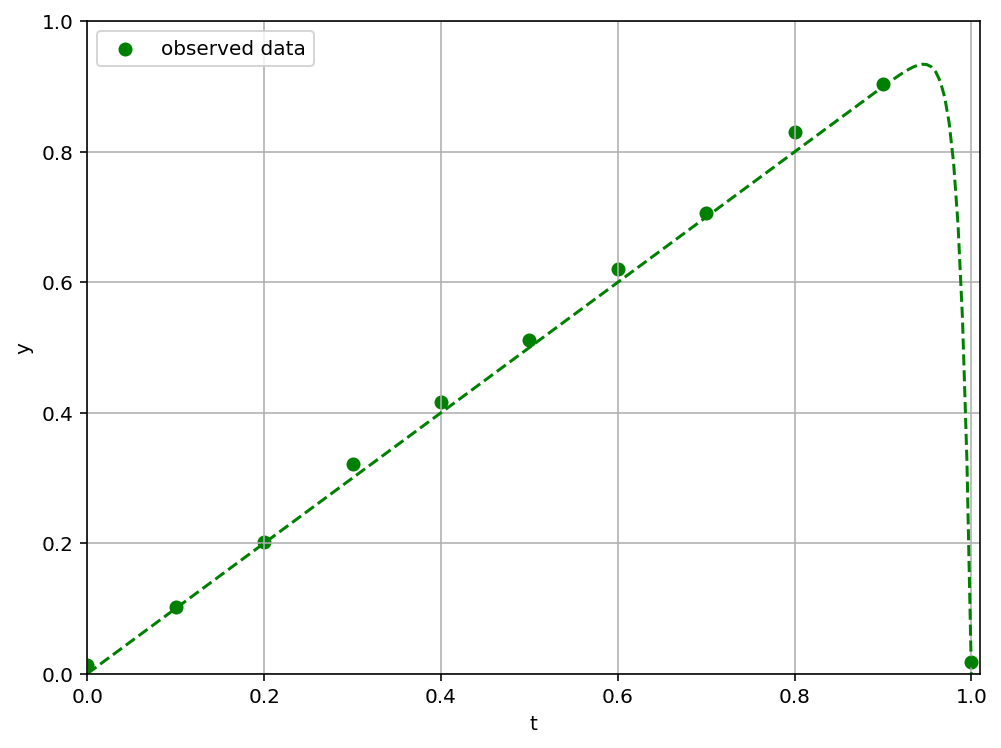

In [165]:
poly_dim = 80

w = np.concatenate(([-1], [0]*(poly_dim-2), [1, 0]))
f = np.poly1d(w)
t = np.linspace(0, 1, 200)
x = np.arange(0, 1.1, step=0.1)
y = f(x) + np.random.normal(loc=0.01, scale=0.01, size=len(x))

def format_plot():
    plt.xlabel('t')
    plt.ylabel('y')
    plt.xlim((0,1.01))
    plt.ylim((0,1))
    plt.grid()
    plt.legend()

plt.figure(figsize=(8,6))
plt.plot(t, f(t), linestyle='dashed', color='green')
plt.scatter(x, y, color='green', marker='o', label="observed data")
format_plot()

plt.savefig('output/poly_base.png')

In [176]:
# 前準備
from sklearn.linear_model import LinearRegression, Lasso, OrthogonalMatchingPursuit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_preprocess = PolynomialFeatures(poly_dim, include_bias=False)

# models
linear = LinearRegression()
lasso = Lasso(alpha=0.002, max_iter=500000, tol=0.000001)
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=5)

def fit_and_predict(predictor):
    model = make_pipeline(poly_preprocess, predictor)
    model.fit(x.reshape(-1, 1), y)
    y_predicted = model.predict(x.reshape(-1, 1))
    t_predicted = model.predict(t.reshape(-1, 1))
    return y_predicted, t_predicted

## Linear Regression

CPU times: user 287 ms, sys: 23 ms, total: 310 ms
Wall time: 351 ms


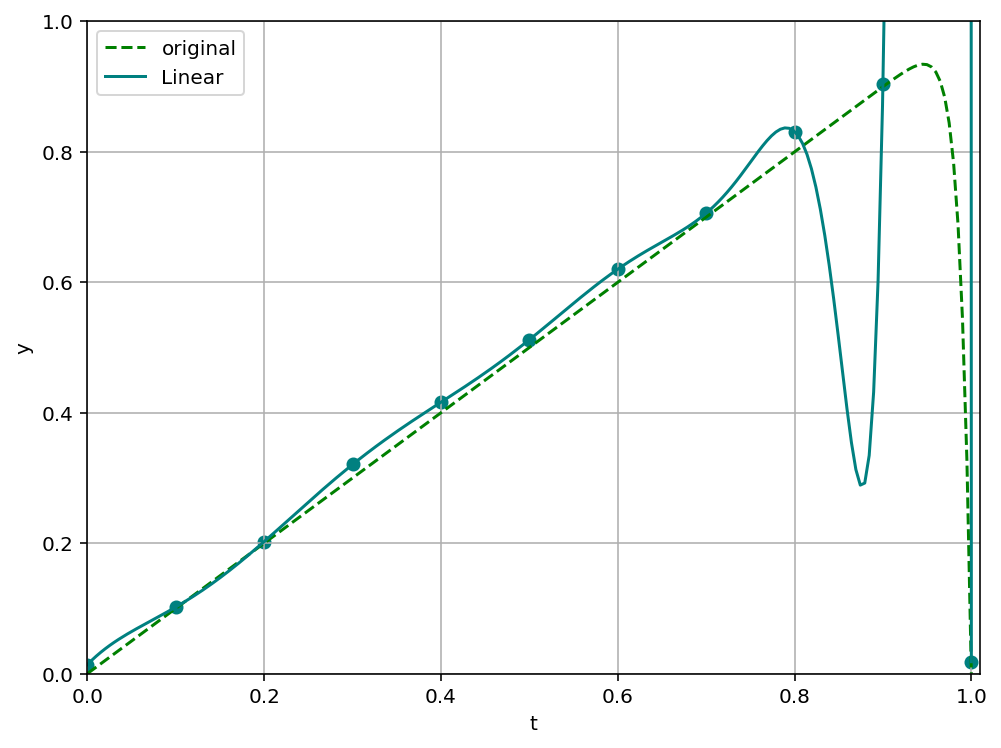

In [183]:
%%time

y_predicted, t_predicted = fit_and_predict(linear)

plt.figure(figsize=(8,6))
plt.plot(t, f(t), linestyle='dashed', color='green', label='original')
plt.plot(t, t_predicted, color=v['color'], label='Linear')
plt.scatter(x, y_predicted, color=v['color'], marker='o')

format_plot()

plt.savefig('output/poly_linear.png')

In [184]:
print(linear.intercept_)
print(linear.coef_)

0.013843043518508902
[ 1.39462876e+00 -1.10428069e+01  7.81996859e+01 -2.06901816e+02
  1.56271555e+02  1.24845461e+02 -6.18844051e+01 -1.37027176e+02
 -8.75507028e+01  3.30463204e+00  7.12908732e+01  9.51718087e+01
  8.19234987e+01  4.83314058e+01  9.91730576e+00 -2.31338111e+01
 -4.60439421e+01 -5.79659755e+01 -6.03213167e+01 -5.54980306e+01
 -4.60157983e+01 -3.40810931e+01 -2.14104938e+01 -9.21311703e+00
  1.74682886e+00  1.10574809e+01  1.85649363e+01  2.42906357e+01
  2.83653333e+01  3.09797330e+01  3.23496628e+01  3.26929211e+01
  3.22149562e+01  3.11009128e+01  2.95120629e+01  2.75851091e+01
  2.54332573e+01  2.31482797e+01  2.08030445e+01  1.84541686e+01
  1.61445857e+01  1.39059101e+01  1.17605403e+01  9.72348191e+00
  7.80389910e+00  6.00641136e+00  4.33216413e+00  2.77970117e+00
  1.34566759e+00  2.53700941e-02 -1.18678138e+00 -2.29692981e+00
 -3.31150680e+00 -4.23703248e+00 -5.07996689e+00 -5.84660228e+00
 -6.54298743e+00 -7.17487716e+00 -7.74770111e+00 -8.26654733e+00
 -8.

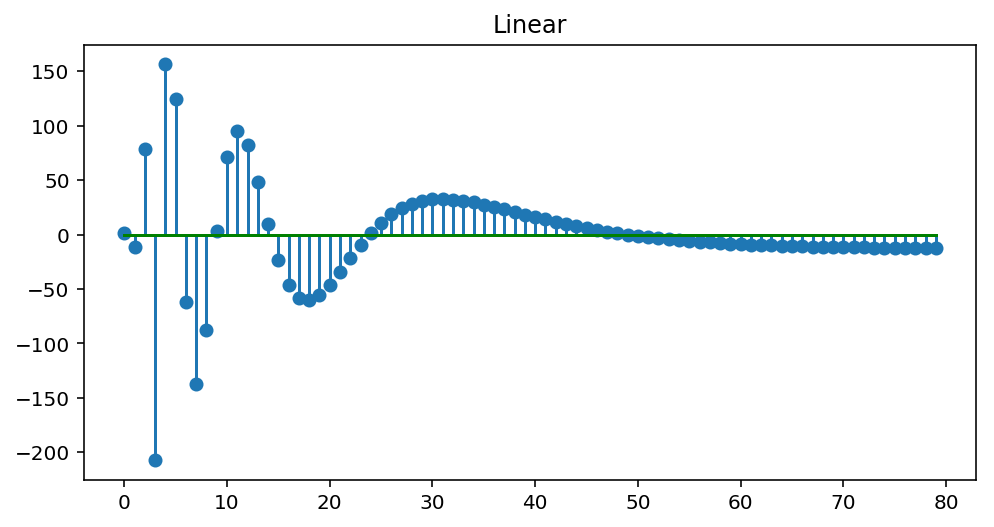

In [185]:
coef = linear.coef_
idx, = coef.nonzero()
plt.figure(figsize=(8,4))
plt.stem(idx, coef[idx], basefmt='g-')
plt.title('Linear')

plt.savefig('output/poly_linear_coef.png')

## Lasso

CPU times: user 1.71 s, sys: 27.3 ms, total: 1.74 s
Wall time: 1.79 s


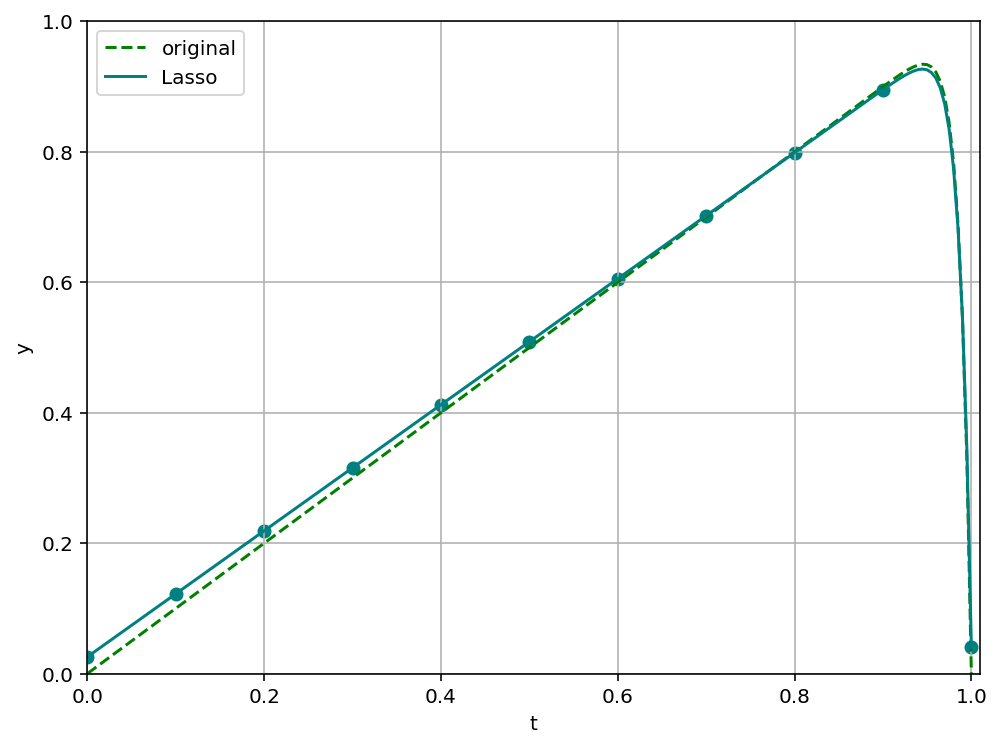

In [186]:
%%time

y_predicted, t_predicted = fit_and_predict(lasso)

plt.figure(figsize=(8,6))
plt.plot(t, f(t), linestyle='dashed', color='green', label='original')
plt.plot(t, t_predicted, color=v['color'], label='Lasso')
plt.scatter(x, y_predicted, color=v['color'], marker='o')

format_plot()
plt.savefig('output/poly_lasso.png')

In [187]:
print(lasso.intercept_)
print(lasso.coef_)
print(lasso.n_iter_)

0.02572955009871236
[ 0.96632118  0.          0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.20319168 -0.18284778 -0.16454234 -0.14807157
 -0.13325116 -0.11991544]
498764


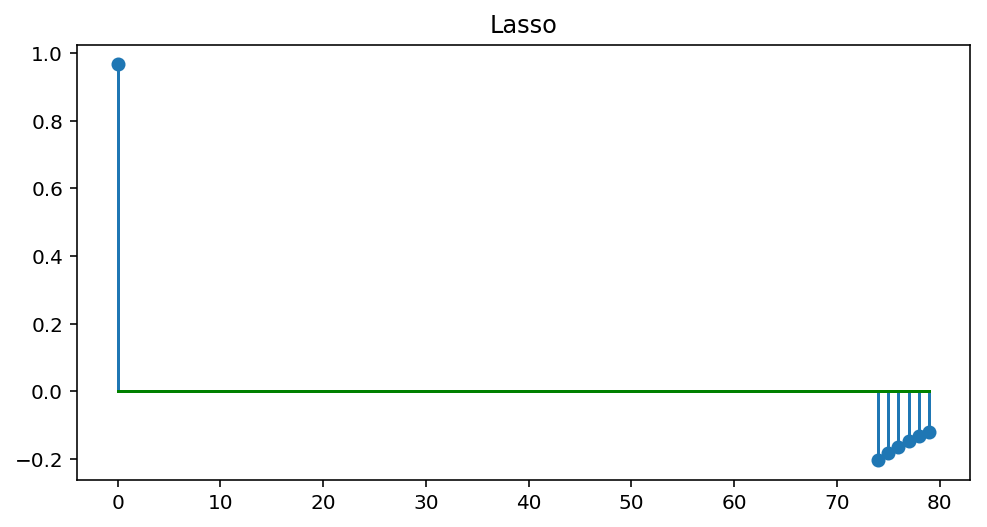

In [188]:
coef = lasso.coef_
idx, = coef.nonzero()
plt.figure(figsize=(8,4))
plt.stem(idx, coef[idx], basefmt='g-')
plt.title('Lasso')
plt.savefig('output/poly_lasso_coef.png')

## OMP

CPU times: user 280 ms, sys: 16.6 ms, total: 296 ms
Wall time: 322 ms


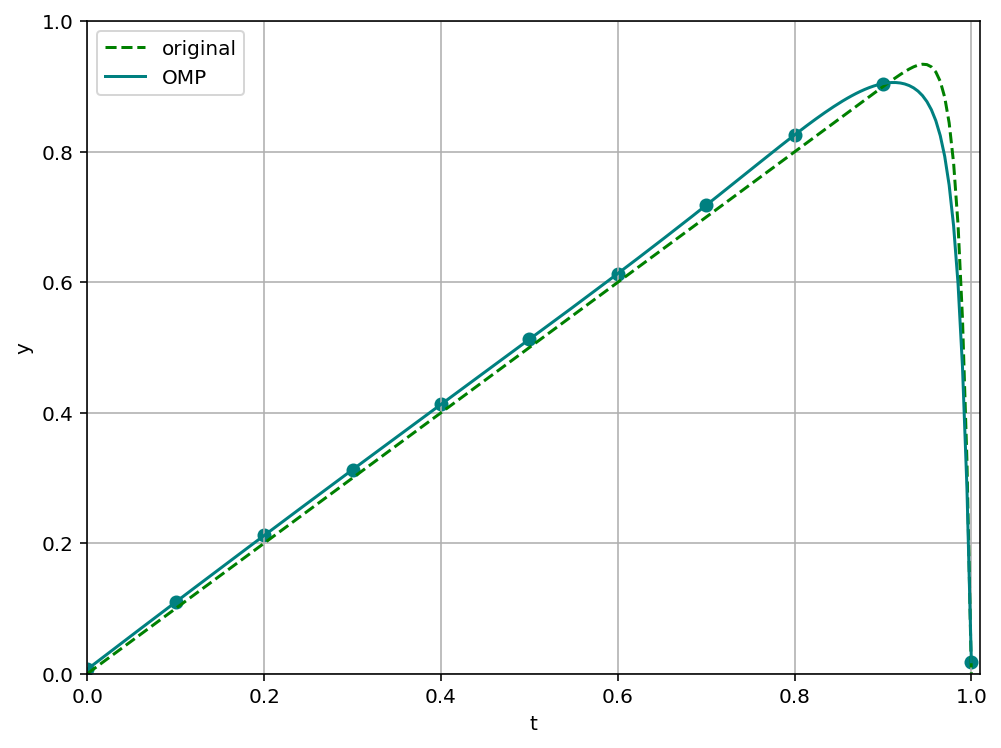

In [190]:
%%time

y_predicted, t_predicted = fit_and_predict(omp)

plt.figure(figsize=(8,6))
plt.plot(t, f(t), linestyle='dashed', color='green', label='original')
plt.plot(t, t_predicted, color=v['color'], label='OMP')
plt.scatter(x, y_predicted, color=v['color'], marker='o')

format_plot()
plt.savefig('output/poly_omp.png')

In [191]:
print(omp.intercept_)
print(omp.coef_)
print(omp.n_iter_)

0.006730869239963688
[ 1.03645879 -0.05599083  0.          0.          0.          0.
  0.17594442  0.          0.          0.          0.          0.
  0.          0.          0.         -0.39778657  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.74712796]
5


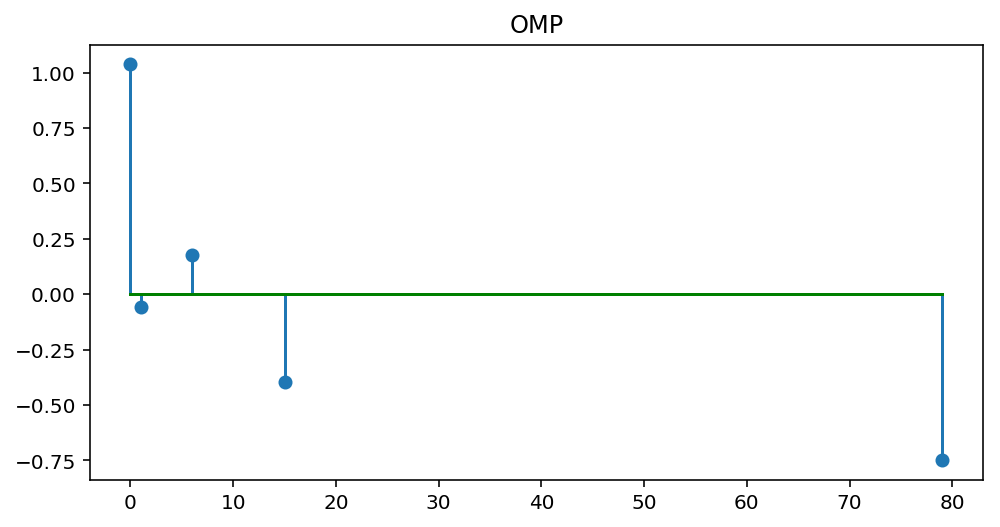

In [192]:
coef = omp.coef_
idx, = coef.nonzero()
plt.figure(figsize=(8,4))
plt.stem(idx, coef[idx], basefmt='g-')
plt.title('OMP')
plt.savefig('output/poly_omp_coef.png')

# 低ランク行列再構成

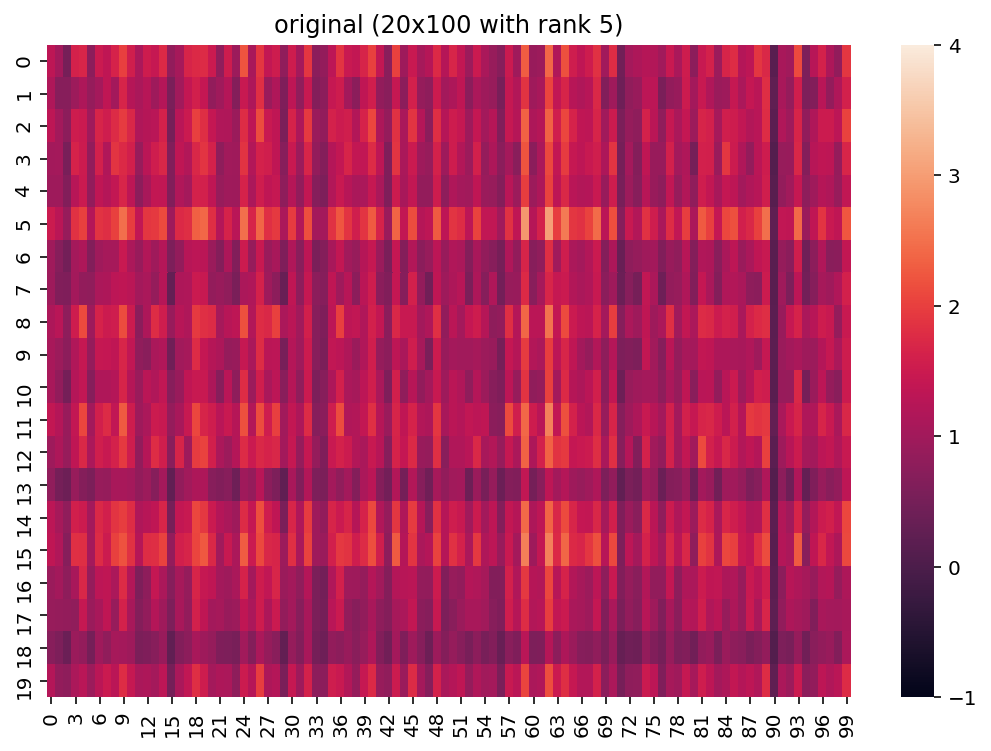

In [28]:
%aimport matrix

m = 20
n = 100
rank = 5

X = matrix.generate_random_matrix((m, n), rank)
vmax = np.ceil(np.max(X))

plt.figure(figsize=(9,6))
ax = sns.heatmap(X, vmin=-1, vmax=vmax)
ax.set_title(f'original ({m}x{n} with rank {rank})')

plt.savefig('output/lrmr_original.png')
X.dump('output/lrmr_original.npy')

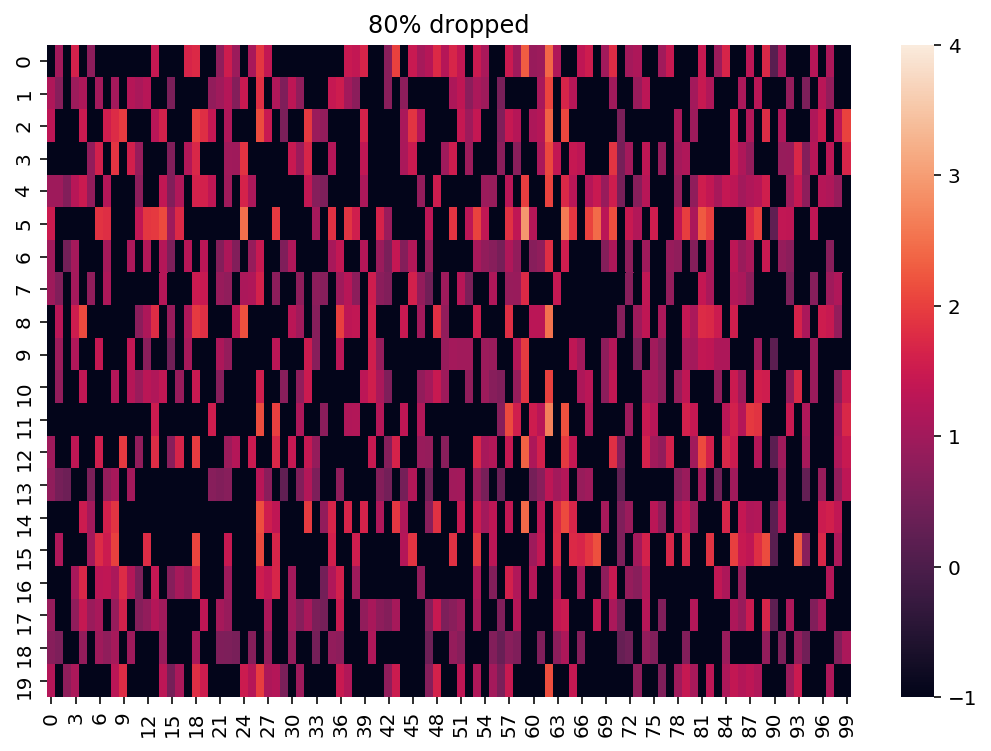

In [29]:
drop_ratio = 0.8
X_dropped = matrix.drop_values(X, ratio=drop_ratio)

plt.figure(figsize=(9,6))
ax = sns.heatmap(X_dropped, vmin=-1, vmax=vmax)
ax.set_title(f'{drop_ratio:.0%} dropped')

plt.savefig('output/lrmr_dropped.png')
X.dump('output/lrmr_dropped.npy')

0.001715050427263651
CPU times: user 2.16 s, sys: 65.4 ms, total: 2.23 s
Wall time: 2.27 s


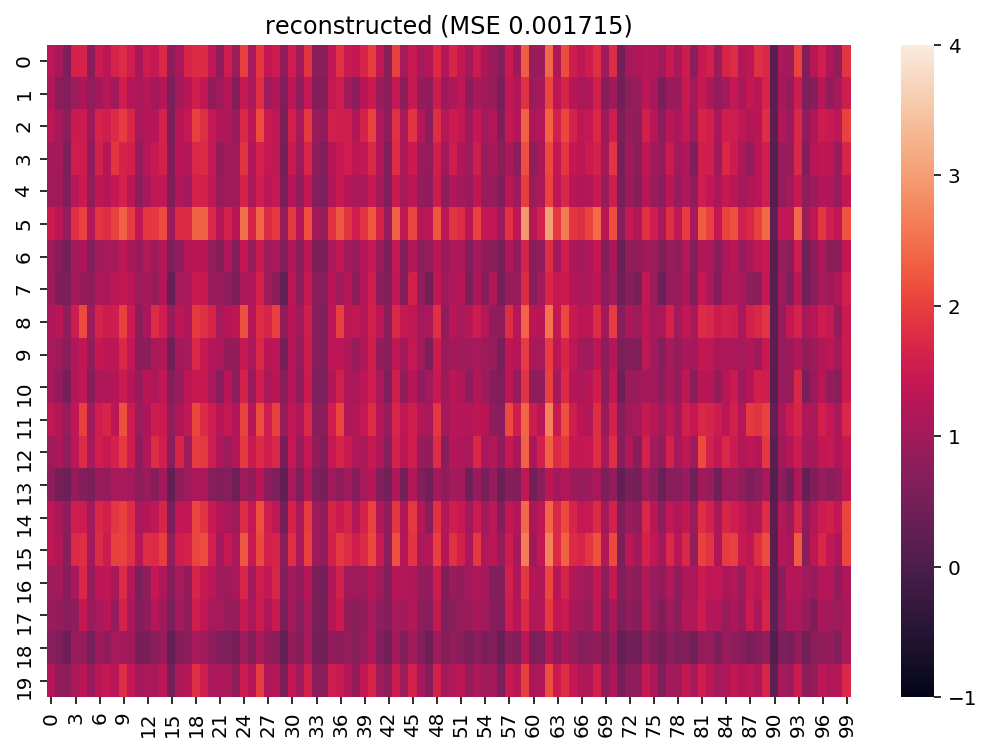

In [30]:
%%time

from sklearn.metrics import mean_squared_error

model = matrix.LowrankReconstruction()
X_reconstructed = model.transform(X_dropped)
mse = mean_squared_error(X, X_reconstructed)

plt.figure(figsize=(9,6))
ax = sns.heatmap(X_reconstructed, vmin=-1, vmax=vmax)
ax.set_title(f'reconstructed (MSE {mse:.6f})')

plt.savefig('output/lrmr_reconstructed.png')
X.dump('output/lrmr_reconstructed.npy')
print(mse)